In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from tqdm import tqdm
import discrete_opinion as dp

# Propaganda vs mu

In [2]:
def most_frequent_value(arr,propaganda):
    values, counts = np.unique(arr, return_counts=True)
    smax = np.max(counts)
    sprop_index = np.where(values == propaganda)[0][0]
    sprop = counts[sprop_index]
    
    return smax, sprop
    

In [3]:
ob1 = dp.Global(size = 1000, options = 100)

In [7]:
tol = np.arange(0,100,1) # Tolerance
resres1 = []
resres2 = []
for rep in tqdm(range(50)):
    res1 = np.empty(100) #Save smax
    res2 = np.empty(100) #Save sprop
    for i in tol:
        lisq = ob1.simul_global_evol(i, 100/100, 150000, 50)
        smax, sprop = most_frequent_value(lisq,50)
        res1[i] = smax
        res2[i] = sprop
    resres1.append(res1)
    resres2.append(res2)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [13:59<00:00, 16.79s/it]


In [9]:

mean_res1 = np.mean(resres1, axis =0)
mean_res2 = np.mean(resres2, axis =0)

In [8]:
smax_data = pd.DataFrame(resres1, index = None)
sprop_data = pd.DataFrame(resres2, index = None)

smax_data.to_csv('data/smax_vs_mu_i100_prop50.csv')
sprop_data.to_csv('data/sprop_vs_mu_i100_prop50.csv')

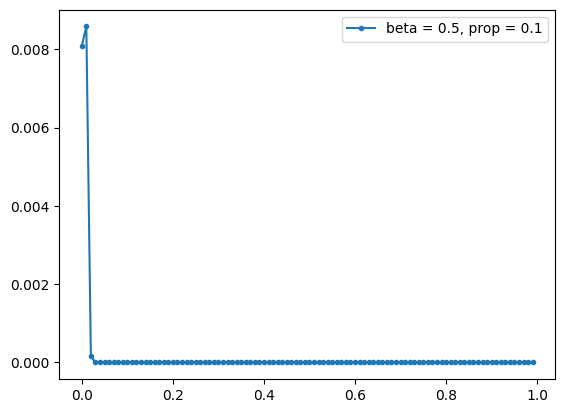

In [10]:
plt.plot(tol/100,abs(mean_res1-mean_res2)/1000,'.-',label = 'beta = 0.5, prop = 0.1')
plt.legend()

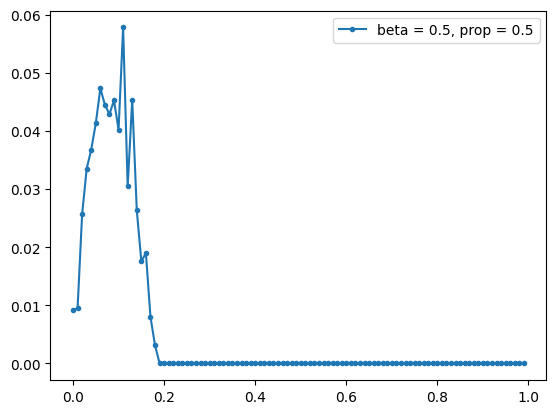

In [96]:
plt.plot(tol/100,abs(mean_res1-mean_res2)/1000,'.-',label = 'beta = 0.5, prop = 0.5')
plt.legend()

## Data complete

In [4]:
stot = []
ptot = []
for prop in range(1,100):
    s = pd.read_csv(f"raw_data/data_prop_vs_tol_inten50/smax_vs_mu_p{prop}.csv")
    p = pd.read_csv(f"raw_data/data_prop_vs_tol_inten50/sprop_vs_mu_p{prop}.csv")
    
    
    stot.append(np.mean(s.to_numpy(),axis = 0))
    ptot.append(np.mean(p.to_numpy(),axis = 0))

stot = np.array(stot) 
ptot = np.array(ptot)

C:\Users\RAUL\AppData\Local\Temp\ipykernel_18716\529742783.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10((stot - ptot)/1000),origin = "lower", cmap='magma')


([<matplotlib.axis.YTick at 0x1390709f670>,
 [Text(0, 9, '0.1'),
  Text(0, 19, '0.2'),
  Text(0, 29, '0.3'),
  Text(0, 39, '0.4'),
  Text(0, 49, '0.5'),
  Text(0, 59, '0.6'),
  Text(0, 69, '0.7'),
  Text(0, 79, '0.8'),
  Text(0, 89, '0.9')])

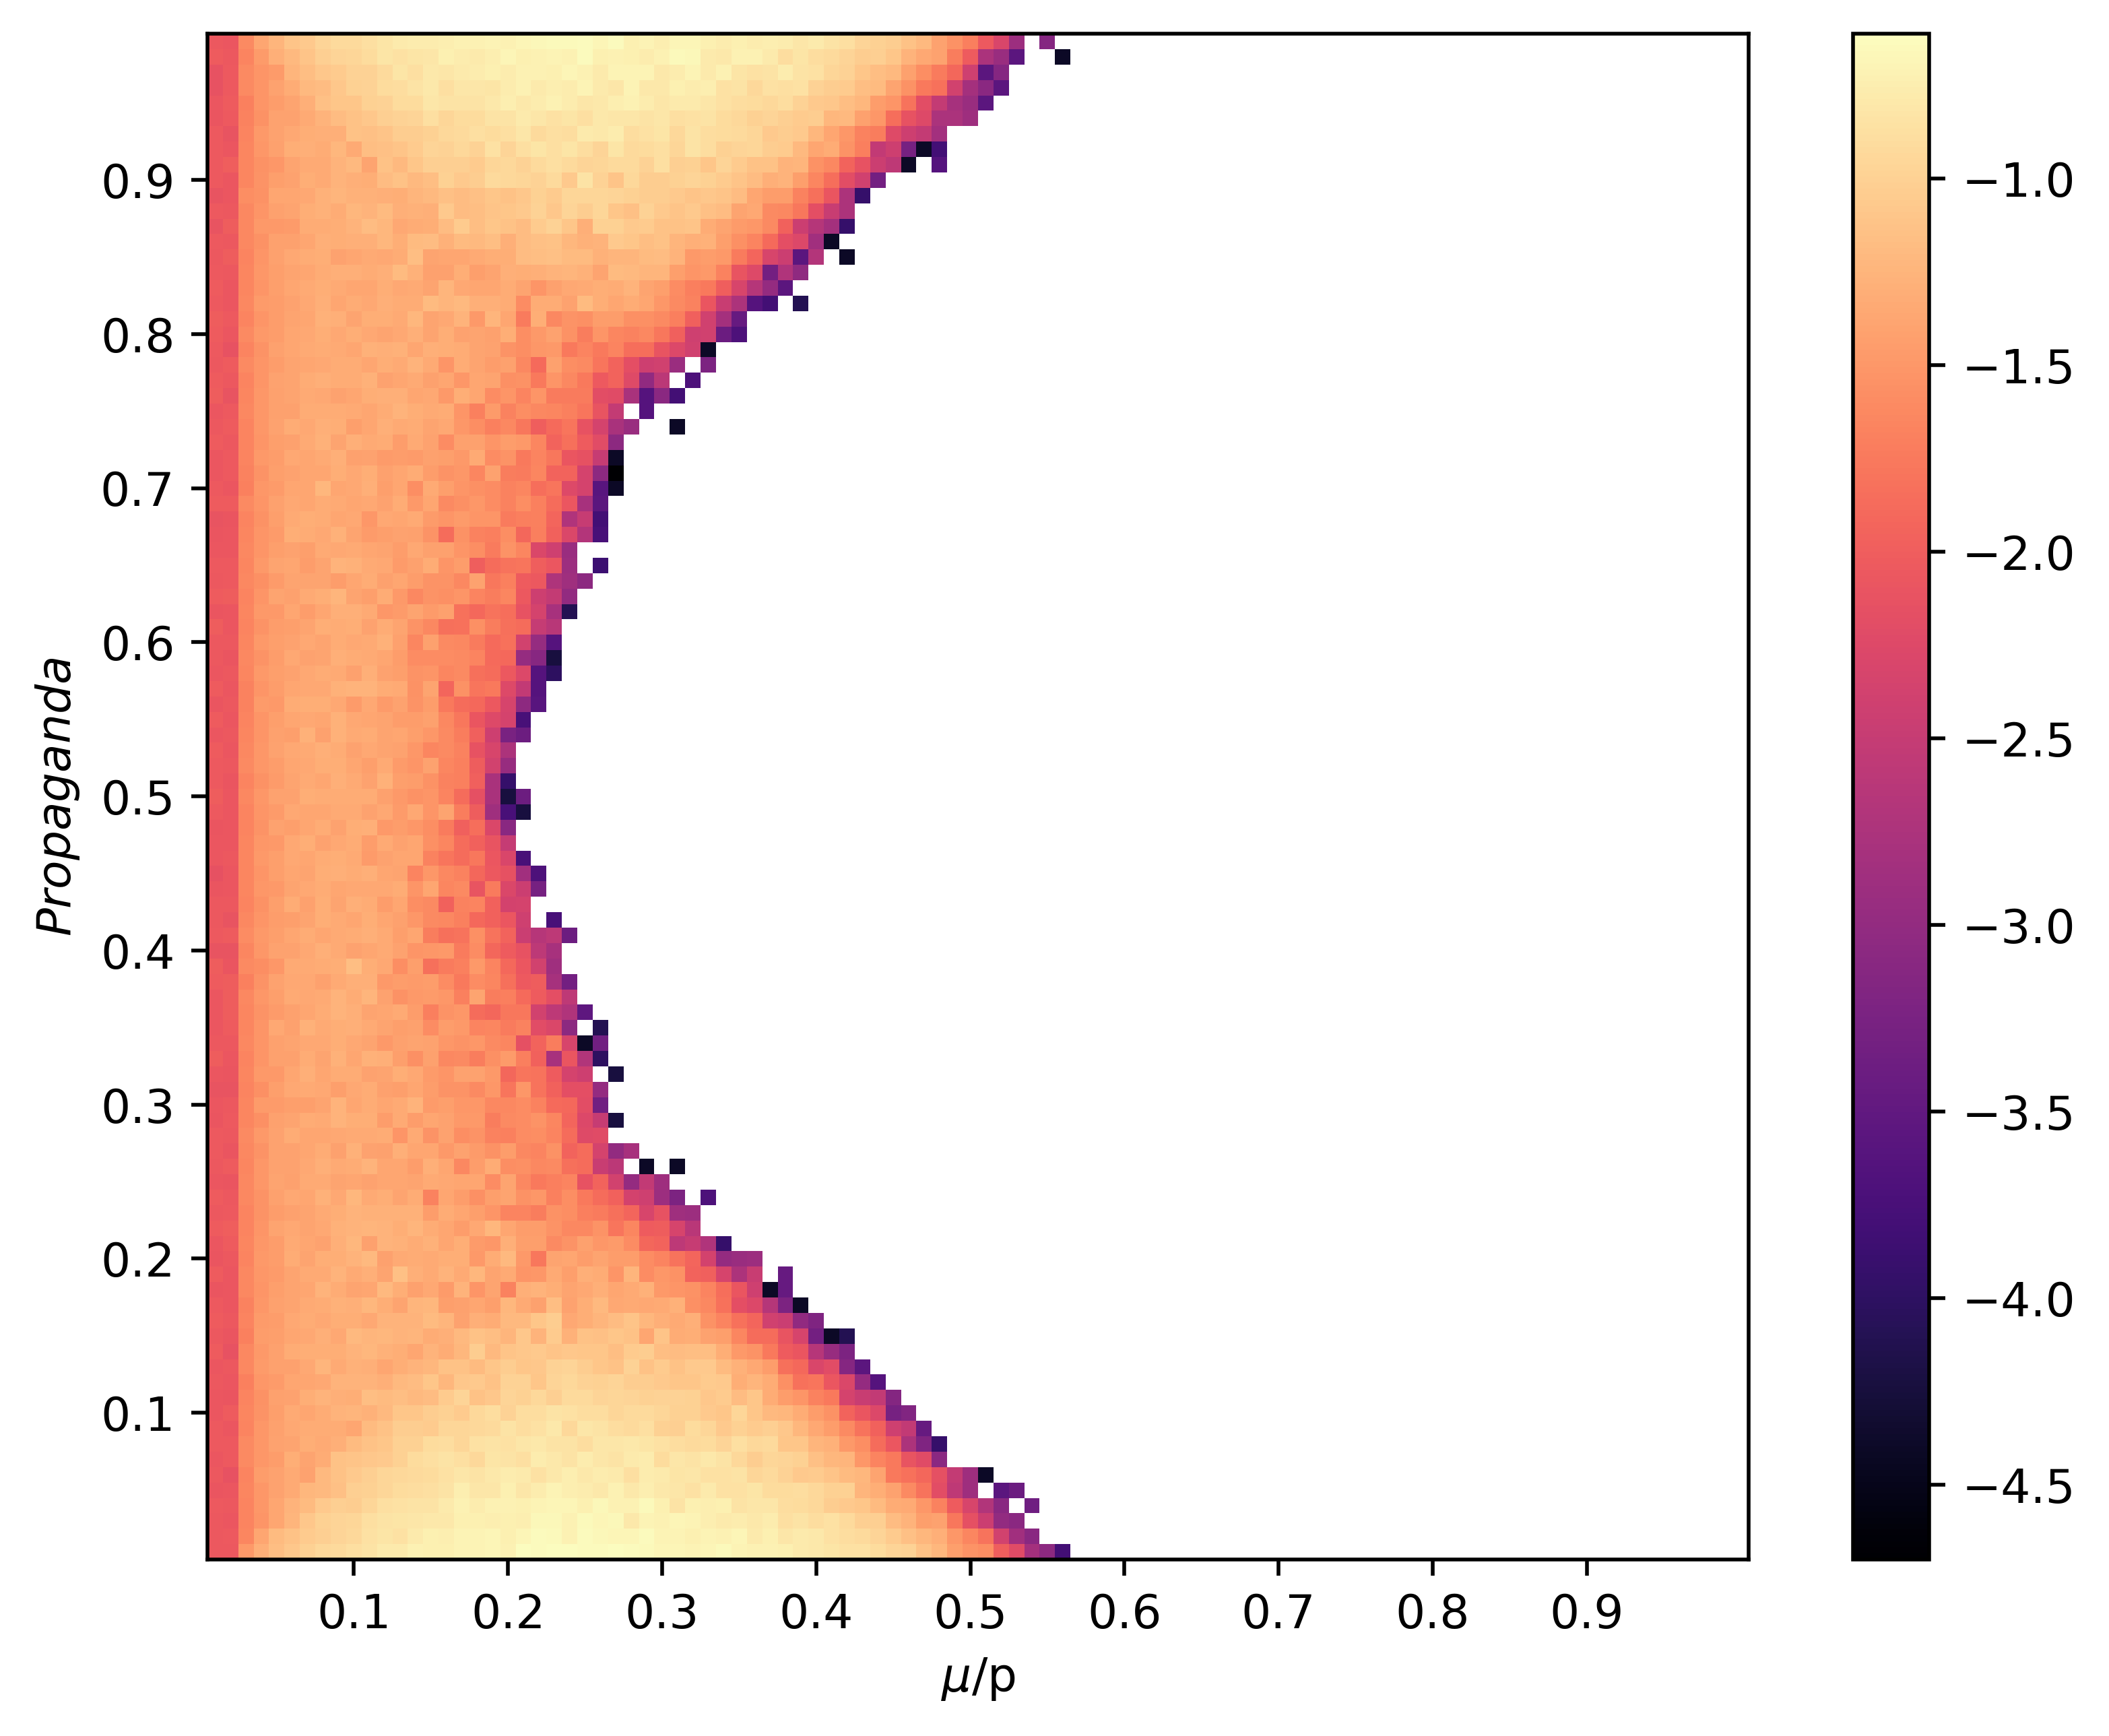

In [13]:
fig = plt.figure(figsize=(8, 6), dpi=500)
plt.imshow(np.log10((stot - ptot)/1000),origin = "lower", cmap='magma')
plt.colorbar()
plt.xlabel(r"$\mu$/p")
plt.ylabel(r"$Propaganda$")
plt.xticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.yticks([9,19,29,39,49,59,69,79,89], ['0.1', '0.2', '0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
#plt.show()
#plt.savefig("Images/global_prop_vs_mu_n1000_p100_i050.png",dpi=500)

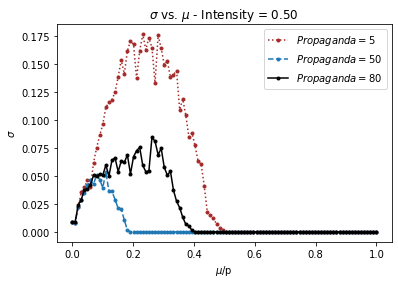

In [11]:
plt.plot(np.linspace(0,1,100),(stot[5]- ptot[5])/1000,'.:',color = 'brown',label = r'$Propaganda = 5$')
plt.plot(np.linspace(0,1,100),(stot[50]- ptot[50])/1000,'.--',label = r'$Propaganda = 50$')
plt.plot(np.linspace(0,1,100),(stot[85]- ptot[85])/1000,'.-', color = 'black',label = r'$Propaganda = 80$')
plt.xlabel(r'$\mu$/p')
plt.ylabel(r'$\sigma$')
plt.title(r'$\sigma$ vs. $\mu$ - Intensity = 0.50 ')
plt.legend()
#plt.show()
plt.savefig("Images/profile_sigma_vs_mu_n1000_p100_intensity050.png", dpi = 500)